# Questionnaire Analysis - 2020 edition
There are differences in a) the number of participants analyzed and b) the measures that should be compared. In this script I compare the questionnaire results to the 2020 re-analyzed data.

In [1]:
library(psych)

## Retrieve questionnaires data

In [2]:
topdir = getwd()

infile <- paste(topdir, '/survey_measures.csv',sep="")
print(infile)
survey <- read.csv(infile)

[1] "/media/NCILscience/ColinConrad_eLearn/full_study/analysis/survey_measures.csv"


In [3]:
head(survey)

Subj,Age,Gender,Degree,Interest,ATTN_TotalAttention,ATTN_Focus,ATTN_ThoughtAhead,ATTN_AttentionCorrect,TLX_Pace,⋯,TU_RPast,TU_DPast,TU_Future,TR_Email,TR_SocialMedia,TR_Browsing,TR_Phone,TR_Online,Pre_Score,Post_Score
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,23,M,BCSC,5,4,2,2,6,6,⋯,1,1,1,1,1,1,1,6,2,8
2,24,M,OTHER,7,6,2,5,7,1,⋯,3,3,6,1,1,5,1,1,5,5
3,21,M,BCSC,5,6,6,4,5,6,⋯,2,3,6,1,1,1,1,1,2,4
4,27,M,BSC,5,6,4,3,5,5,⋯,5,1,5,7,3,4,7,5,4,6
5,18,M,BCSC,5,4,5,4,5,6,⋯,5,2,3,1,5,3,6,1,4,2
6,22,F,OTHER,4,5,5,2,4,6,⋯,4,1,6,1,1,5,1,1,8,4


In [4]:
infile <- paste(topdir, '/experience_samples.csv',sep="")
samples <- read.csv(infile)

In [5]:
head(samples)

participant_id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,1,2,1,3,2,5,1,4,1
2,3,1,1,1,1,2,3,1,4,2
3,4,2,1,1,3,1,2,3,2,1
4,2,1,3,4,1,3,2,4,3,2
5,2,2,2,3,3,4,3,3,3,3
6,1,2,1,2,3,2,2,3,4,1


## Merge files

In [6]:
dat <- merge(survey, samples, by.x="Subj", by.y="participant_id")

In [7]:
head(dat)

Subj,Age,Gender,Degree,Interest,ATTN_TotalAttention,ATTN_Focus,ATTN_ThoughtAhead,ATTN_AttentionCorrect,TLX_Pace,⋯,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,23,M,BCSC,5,4,2,2,6,6,⋯,2,1,2,1,3,2,5,1,4,1
2,24,M,OTHER,7,6,2,5,7,1,⋯,3,1,1,1,1,2,3,1,4,2
3,21,M,BCSC,5,6,6,4,5,6,⋯,4,2,1,1,3,1,2,3,2,1
4,27,M,BSC,5,6,4,3,5,5,⋯,2,1,3,4,1,3,2,4,3,2
5,18,M,BCSC,5,4,5,4,5,6,⋯,2,2,2,3,3,4,3,3,3,3
6,22,F,OTHER,4,5,5,2,4,6,⋯,1,2,1,2,3,2,2,3,4,1


### Save these for consistency check

In [8]:
interest = dat[c(1)] # this is the control item

attn = dat[c(6:9)] # this does not seem to come from the TLX and was mistakenly ascribed to it

tlx = dat[c(10:15)] # the original TLX

TU = dat[c(16:24)] # Sullivan technology unrelated MW 

TR = dat[c(24:29)]

scores = dat[c(30:31)]

exp = dat[c(32:41)]

# Check measures using Cronbach's alpha for ATTN
There is a clear attention measure related to TotalAttention and AttentionCorrect.

In [9]:
fa(attn)

Factor Analysis using method =  minres
Call: fa(r = attn)
Standardized loadings (pattern matrix) based upon correlation matrix
                       MR1    h2   u2 com
ATTN_TotalAttention   0.77 0.587 0.41   1
ATTN_Focus            0.16 0.024 0.98   1
ATTN_ThoughtAhead     0.27 0.073 0.93   1
ATTN_AttentionCorrect 0.83 0.690 0.31   1

                MR1
SS loadings    1.37
Proportion Var 0.34

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  6  and the objective function was  0.7 with Chi Square of  31.37
The degrees of freedom for the model are 2  and the objective function was  0.1 

The root mean square of the residuals (RMSR) is  0.08 
The df corrected root mean square of the residuals is  0.13 

The harmonic number of observations is  48 with the empirical chi square  3.27  with prob <  0.2 
The total number of observations was  48  with Likelihood Chi Square =  4.28  with prob <  0.12 

Tucker Lewis In

# Check the measures using Cronbach's alpha for TLX
The TLX seems to diverge between workload and success measures. 

In [10]:
alpha(tlx)

Warning message in alpha(tlx):
“Some items were negatively correlated with the total scale and probably 
should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option”

Some items ( TLX_Success ) were negatively correlated with the total scale and 
probably should be reversed.  
To do this, run the function again with the 'check.keys=TRUE' option


Reliability analysis   
Call: alpha(x = tlx)

  raw_alpha std.alpha G6(smc) average_r  S/N  ase mean   sd median_r
      0.26      0.22    0.42     0.044 0.28 0.16  3.5 0.69     0.12

 lower alpha upper     95% confidence boundaries
-0.05 0.26 0.57 

 Reliability if an item is dropped:
                        raw_alpha std.alpha G6(smc) average_r    S/N alpha se
TLX_Pace                    0.267     0.206    0.44    0.0495  0.260     0.15
TLX_Success                 0.516     0.538    0.55    0.1887  1.163     0.11
TLX_WorkedHard              0.086     0.022    0.19    0.0045  0.023     0.20
TLX_DiscouragedAnnoyed      0.178     0.140    0.31    0.0316  0.163     0.18
TLX_MentallyDemanding      -0.049    -0.145    0.14   -0.0261 -0.127     0.22
TLX_PhysicallyDemanding     0.125     0.076    0.33    0.0161  0.082     0.19
                        var.r   med.r
TLX_Pace                0.120  0.1434
TLX_Success             0.035  0.1640
TLX_WorkedHard          0.059 -0.0061
TLX_Discourage

In [11]:
fa(tlx, check.keys=TRUE) # factor analysis

Factor Analysis using method =  minres
Call: fa(r = tlx, check.keys = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
                          MR1     h2   u2 com
TLX_Pace                 0.05 0.0026 1.00   1
TLX_Success             -0.61 0.3713 0.63   1
TLX_WorkedHard           0.72 0.5152 0.48   1
TLX_DiscouragedAnnoyed   0.62 0.3787 0.62   1
TLX_MentallyDemanding    0.44 0.1908 0.81   1
TLX_PhysicallyDemanding  0.36 0.1309 0.87   1

                MR1
SS loadings    1.59
Proportion Var 0.26

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  15  and the objective function was  1.13 with Chi Square of  49.75
The degrees of freedom for the model are 9  and the objective function was  0.41 

The root mean square of the residuals (RMSR) is  0.12 
The df corrected root mean square of the residuals is  0.15 

The harmonic number of observations is  48 with the empirical chi square  19.1

# A new attention measure
This combines attention factors that were described in the experiement. These three measures are correlated and related.

In [13]:
attn_new = dat[c(6,9,11)]
alpha(attn_new)


Reliability analysis   
Call: alpha(x = attn_new)

  raw_alpha std.alpha G6(smc) average_r S/N   ase mean  sd median_r
      0.86      0.87    0.82      0.68 6.5 0.034  4.4 1.2     0.64

 lower alpha upper     95% confidence boundaries
0.8 0.86 0.93 

 Reliability if an item is dropped:
                      raw_alpha std.alpha G6(smc) average_r S/N alpha se var.r
ATTN_TotalAttention        0.78      0.78    0.64      0.64 3.6    0.063    NA
ATTN_AttentionCorrect      0.86      0.87    0.77      0.77 6.5    0.039    NA
TLX_Success                0.78      0.78    0.64      0.64 3.6    0.063    NA
                      med.r
ATTN_TotalAttention    0.64
ATTN_AttentionCorrect  0.77
TLX_Success            0.64

 Item statistics 
                       n raw.r std.r r.cor r.drop mean  sd
ATTN_TotalAttention   48  0.91  0.90  0.84   0.77  4.3 1.4
ATTN_AttentionCorrect 48  0.86  0.86  0.73   0.68  4.9 1.4
TLX_Success           48  0.90  0.90  0.84   0.78  4.1 1.3

Non missing response freque

## Consistency checks on TR and TU
These both look fine.

In [14]:
fa(TR)

Factor Analysis using method =  minres
Call: fa(r = TR)
Standardized loadings (pattern matrix) based upon correlation matrix
                MR1    h2   u2 com
TU_Future      0.16 0.026 0.97   1
TR_Email       0.68 0.457 0.54   1
TR_SocialMedia 0.83 0.682 0.32   1
TR_Browsing    0.76 0.580 0.42   1
TR_Phone       0.77 0.586 0.41   1
TR_Online      0.78 0.605 0.39   1

                MR1
SS loadings    2.94
Proportion Var 0.49

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  15  and the objective function was  2.51 with Chi Square of  110.77
The degrees of freedom for the model are 9  and the objective function was  0.16 

The root mean square of the residuals (RMSR) is  0.06 
The df corrected root mean square of the residuals is  0.07 

The harmonic number of observations is  48 with the empirical chi square  4.55  with prob <  0.87 
The total number of observations was  48  with Likelihood Chi Square =  7.1

In [15]:
fa(TU)

Factor Analysis using method =  minres
Call: fa(r = TU)
Standardized loadings (pattern matrix) based upon correlation matrix
             MR1   h2   u2 com
TU_Family   0.70 0.49 0.51   1
TU_Friends  0.78 0.60 0.40   1
TU_Guilty   0.65 0.43 0.57   1
TU_Personal 0.76 0.57 0.43   1
TU_Angry    0.57 0.33 0.67   1
TU_Earlier  0.53 0.28 0.72   1
TU_RPast    0.84 0.70 0.30   1
TU_DPast    0.51 0.26 0.74   1
TU_Future   0.44 0.19 0.81   1

                MR1
SS loadings    3.86
Proportion Var 0.43

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  36  and the objective function was  4.26 with Chi Square of  183.97
The degrees of freedom for the model are 27  and the objective function was  1.05 

The root mean square of the residuals (RMSR) is  0.1 
The df corrected root mean square of the residuals is  0.11 

The harmonic number of observations is  48 with the empirical chi square  32.88  with prob <  0.2 
The total 

# Calculate measures in a new dataframe

In [16]:
library(ggplot2)
# library(LMERConvenienceFunctions)
library(mgcv)
library(parallel)
library(plyr)
library(tidyr)
library(data.table)
library(viridis)
library(ggthemes)
library(nlme)


Attaching package: ‘ggplot2’

The following objects are masked from ‘package:psych’:

    %+%, alpha

Loading required package: nlme
This is mgcv 1.8-29. For overview type 'help("mgcv-package")'.
Loading required package: viridisLite


In [17]:
ATs = rowSums(attn_new)
TRs = rowSums(TR) 
TUs = rowSums(TU) 
TL = rowSums(tlx)
Diffs = scores$Post_Score - scores$Pre_Score
EX = rowSums(exp)/10

In [18]:
ndat = dat[c(1:5)]
ndat$Attn = ATs
ndat$TRMW = TRs
ndat$TUMW = TUs
ndat$Diff = Diffs
ndat$TLX = TL # this is for sanity's sake
ndat$EX = EX

In [19]:
head(ndat)

Subj,Age,Gender,Degree,Interest,Attn,TRMW,TUMW,Diff,TLX,EX
<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,23,M,BCSC,5,15,11,9,6,27,2.2
2,24,M,OTHER,7,17,15,20,0,11,1.9
3,21,M,BCSC,5,16,11,31,2,24,2.0
4,27,M,BSC,5,17,31,23,2,27,2.5
5,18,M,BCSC,5,12,19,23,-2,19,2.8
6,22,F,OTHER,4,14,15,31,-4,24,2.1


# H1 - Mind wandering and attention negatively impacts scores

In [21]:
h1 <- lm(Diff ~ Attn, data=ndat)
aov(h1)
summary(h1)

Call:
   aov(formula = h1)

Terms:
                     Attn Residuals
Sum of Squares   34.30098 250.17819
Deg. of Freedom         1        46

Residual standard error: 2.332093
Estimated effects may be unbalanced


Call:
lm(formula = Diff ~ Attn, data = ndat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0606 -1.5954  0.0557  1.3525  5.4046 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.19600    1.27633  -0.937   0.3536  
Attn         0.23261    0.09263   2.511   0.0156 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.332 on 46 degrees of freedom
Multiple R-squared:  0.1206,	Adjusted R-squared:  0.1015 
F-statistic: 6.307 on 1 and 46 DF,  p-value: 0.0156


In [20]:
h1 <- lm(Diff ~ EX, data=ndat)
aov(h1)
summary(h1)

Call:
   aov(formula = h1)

Terms:
                       EX Residuals
Sum of Squares   28.12815 256.35101
Deg. of Freedom         1        46

Residual standard error: 2.360688
Estimated effects may be unbalanced


Call:
lm(formula = Diff ~ EX, data = ndat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3772 -1.3172 -0.2878  1.3738  5.4480 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.8531     1.3597   3.569 0.000851 ***
EX           -1.1790     0.5248  -2.247 0.029506 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.361 on 46 degrees of freedom
Multiple R-squared:  0.09888,	Adjusted R-squared:  0.07929 
F-statistic: 5.047 on 1 and 46 DF,  p-value: 0.02951


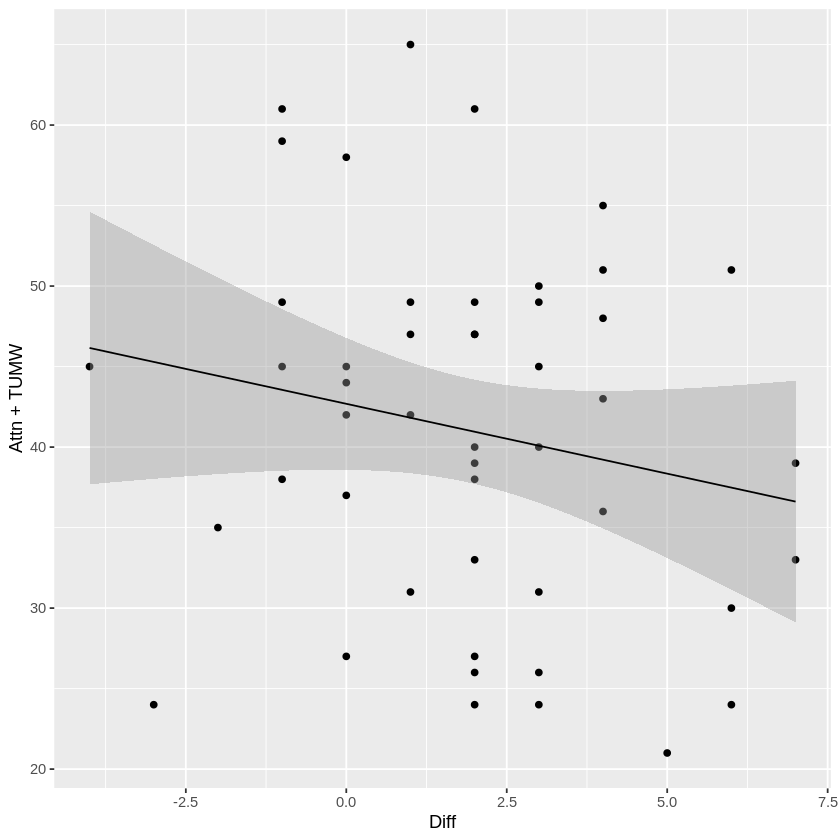

In [35]:
plot <- ggplot(ndat, aes(Diff, Attn + TUMW)) + 
               geom_point(aes(), size = 1.5) + 
               geom_smooth(colour="black", method = 'lm', se=T, size = 0.5)

plot

# H2 - MW varieties were correlated and were experienced differently by different people

In [20]:
h2 <- lm(TRMW ~ TUMW, data=ndat)
aov(h2)
summary(h2)

Call:
   aov(formula = h2)

Terms:
                     TUMW Residuals
Sum of Squares   934.7935 2313.1232
Deg. of Freedom         1        46

Residual standard error: 7.091212
Estimated effects may be unbalanced


Call:
lm(formula = TRMW ~ TUMW, data = ndat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7292 -5.6457 -0.8443  3.6914 21.2708 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.02663    2.68054   2.994  0.00442 ** 
TUMW         0.38493    0.08928   4.312 8.48e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.091 on 46 degrees of freedom
Multiple R-squared:  0.2878,	Adjusted R-squared:  0.2723 
F-statistic: 18.59 on 1 and 46 DF,  p-value: 8.476e-05


In [75]:
h2a <- lm(TRMW ~ Degree + Gender + Age, data=ndat)
aov(h2a)
summary(h2a)

Call:
   aov(formula = h2a)

Terms:
                   Degree    Gender       Age Residuals
Sum of Squares   891.0603   56.9055  189.5601 2110.3907
Deg. of Freedom         6         1         1        39

Residual standard error: 7.356125
Estimated effects may be unbalanced


Call:
lm(formula = TRMW ~ Degree + Gender + Age, data = ndat)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0258  -3.9476  -0.0762   4.8898  16.0585 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -5.4393    10.4387  -0.521   0.6053  
DegreeBACS    1.0844     7.3724   0.147   0.8838  
DegreeBCOMM   8.3274     6.7838   1.228   0.2270  
DegreeBCSC    2.6354     6.7640   0.390   0.6989  
DegreeBMGMT   7.4578     7.3602   1.013   0.3172  
DegreeBSC     9.2367     5.5070   1.677   0.1015  
DegreeOTHER  -1.4781     6.4415  -0.229   0.8197  
GenderM      -4.0245     2.8208  -1.427   0.1616  
Age           0.9156     0.4892   1.872   0.0688 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.356 on 39 degrees of freedom
Multiple R-squared:  0.3502,	Adjusted R-squared:  0.2169 
F-statistic: 2.628 on 8 and 39 DF,  p-value: 0.02096


In [21]:
h2b <- lm(TUMW ~ Degree + Gender + Age, data=ndat)
aov(h2b)
summary(h2b)

Call:
   aov(formula = h2b)

Terms:
                  Degree   Gender      Age Residuals
Sum of Squares  1962.200  839.034    3.559  3504.206
Deg. of Freedom        6        1        1        39

Residual standard error: 9.479
Estimated effects may be unbalanced


Call:
lm(formula = TUMW ~ Degree + Gender + Age, data = ndat)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.7992  -5.8813  -0.6322   6.0613  20.3263 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  33.3212    13.4512   2.477  0.01768 * 
DegreeBACS   -4.8745     9.4999  -0.513  0.61077   
DegreeBCOMM -10.4720     8.7415  -1.198  0.23816   
DegreeBCSC   -2.0396     8.7160  -0.234  0.81620   
DegreeBMGMT  10.9373     9.4842   1.153  0.25585   
DegreeBSC     2.8619     7.0963   0.403  0.68893   
DegreeOTHER  -7.4771     8.3005  -0.901  0.37322   
GenderM     -10.6467     3.6348  -2.929  0.00565 **
Age          -0.1255     0.6304  -0.199  0.84327   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.479 on 39 degrees of freedom
Multiple R-squared:  0.4446,	Adjusted R-squared:  0.3306 
F-statistic: 3.902 on 8 and 39 DF,  p-value: 0.001834


# H3 - There is consistency between the measures

In [22]:
H3 <- lm(EX ~ TUMW + TRMW, data=ndat)
aov(H3)
summary(H3)

Call:
   aov(formula = H3)

Terms:
                     TUMW      TRMW Residuals
Sum of Squares   2.935998  0.880435 16.420234
Deg. of Freedom         1         1        45

Residual standard error: 0.6040646
Estimated effects may be unbalanced


Call:
lm(formula = EX ~ TUMW + TRMW, data = ndat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.03657 -0.44217 -0.02529  0.51050  0.95911 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.753104   0.249607   7.023 9.41e-09 ***
TUMW        0.014063   0.009012   1.560    0.126    
TRMW        0.019510   0.012560   1.553    0.127    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6041 on 45 degrees of freedom
Multiple R-squared:  0.1886,	Adjusted R-squared:  0.1525 
F-statistic:  5.23 on 2 and 45 DF,  p-value: 0.009076


## H4 - Who is interested in the subject?

In [23]:
h3 <- lm(Interest ~ Gender + Degree, data=ndat)
aov(h3)
summary(h3)

Call:
   aov(formula = h3)

Terms:
                  Gender   Degree Residuals
Sum of Squares  19.34697 47.99899  57.90404
Deg. of Freedom        1        6        40

Residual standard error: 1.203163
Estimated effects may be unbalanced


Call:
lm(formula = Interest ~ Gender + Degree, data = ndat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1614 -0.7847 -0.1614  0.6973  2.8386 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.5000     0.8508   4.114 0.000188 ***
GenderM       1.1883     0.4491   2.646 0.011589 *  
DegreeBACS    3.0000     1.2032   2.493 0.016888 *  
DegreeBCOMM  -0.5628     1.1085  -0.508 0.614451    
DegreeBCSC    0.9117     1.1023   0.827 0.413106    
DegreeBMGMT   1.5000     1.2032   1.247 0.219754    
DegreeBSC    -0.3386     0.8863  -0.382 0.704474    
DegreeOTHER   2.0247     1.0225   1.980 0.054609 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.203 on 40 degrees of freedom
Multiple R-squared:  0.5377,	Adjusted R-squared:  0.4568 
F-statistic: 6.646 on 7 and 40 DF,  p-value: 3.099e-05


In [50]:
write.csv(ndat, 'survey_aggregated.csv')

In [23]:
# ndat
h3 <- lm(Diff ~ TLX, data=ndat)
aov(h3)
summary(h3)

Call:
   aov(formula = h3)

Terms:
                      TLX Residuals
Sum of Squares    1.70668 282.77249
Deg. of Freedom         1        46

Residual standard error: 2.47936
Estimated effects may be unbalanced


Call:
lm(formula = Diff ~ TLX, data = ndat)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7475 -1.7934  0.2296  1.1606  5.2985 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.85016    1.84619   1.544    0.129
TLX         -0.04595    0.08720  -0.527    0.601

Residual standard error: 2.479 on 46 degrees of freedom
Multiple R-squared:  0.005999,	Adjusted R-squared:  -0.01561 
F-statistic: 0.2776 on 1 and 46 DF,  p-value: 0.6008
